### Load Dataset

In [35]:
#Load data
import pandas as pd

data = pd.read_csv('day.csv')

### 1. Understanding Data

In [36]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [37]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<p>Check Null Value</p>

In [39]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2. Data Cleaning

In [40]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)


#### Columns Dropped from Analysis

The following columns have been removed from the dataset as they are not required for calculating the total number of users:

* `instant`: Likely an index or unique identifier, not relevant to user count.
* `dteday`: Contains date information, but in the dataset year and month information is given.
* `casual`: Holds the number of casual users, but we need the combined total.
* `registered`: Similar to `casual`, this column counts registered users, not the complete user base.


In [41]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
data.shape

(730, 12)

In [43]:
# Check Correlation
data.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<Axes: >

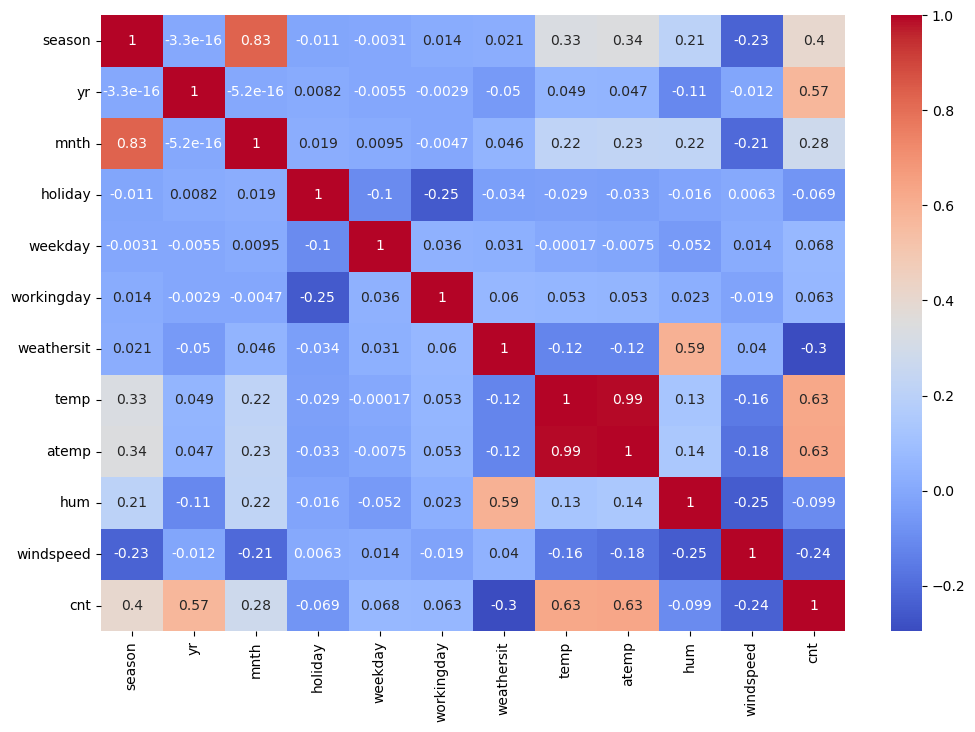

In [44]:
# Check for Correlation using Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<p>temp and atemp are highly correlated
<p> We need to drop atemp

In [45]:
data.drop('atemp', axis=1, inplace=True)

In [46]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [47]:
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,57.7500,10.374682,2729


In [48]:
data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [49]:
# Deal with Categorical Data
data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [50]:
data['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [51]:
data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [52]:
data['holiday'].value_counts()



holiday
0    709
1     21
Name: count, dtype: int64

In [53]:
data['weekday'].value_counts()


weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [54]:

data['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [55]:
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [56]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})
data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['weekday'] = data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
data['weathersit'] = data['weathersit'].map({1: 'Clear_Few_Clouds_PartlyCloudy', 2: 'Mist_Cloudy_BrokenClouds', 3: 'LightSnow_Rain_Thunderstorm_ScatteredClouds', 4: 'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})



In [57]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy_BrokenClouds,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy_BrokenClouds,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear_Few_Clouds_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear_Few_Clouds_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear_Few_Clouds_PartlyCloudy,9.305237,43.6957,12.522300,1600


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


### 3. Exploratory Data Analysis

<Axes: xlabel='weekday', ylabel='cnt'>

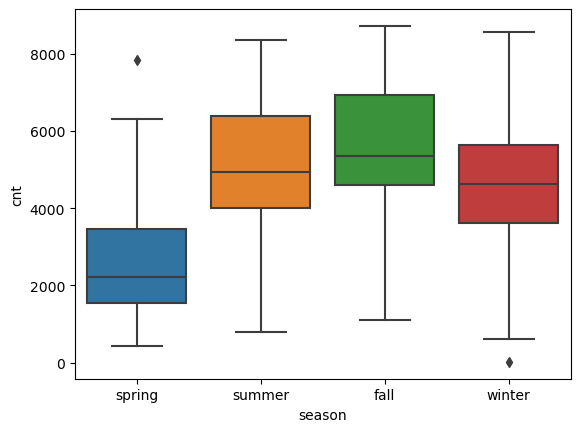

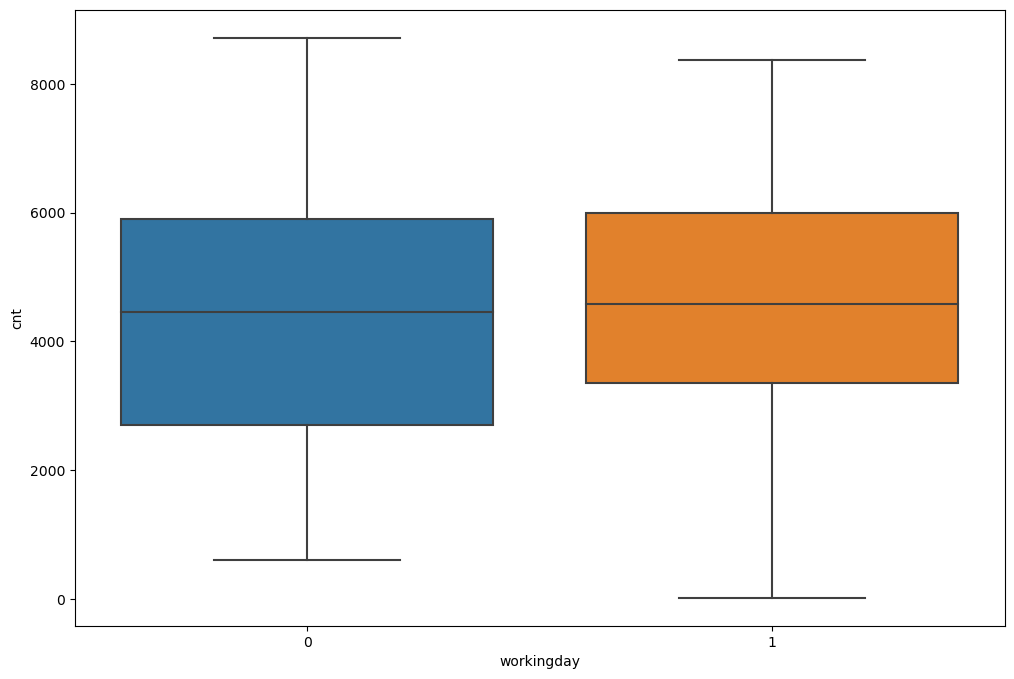

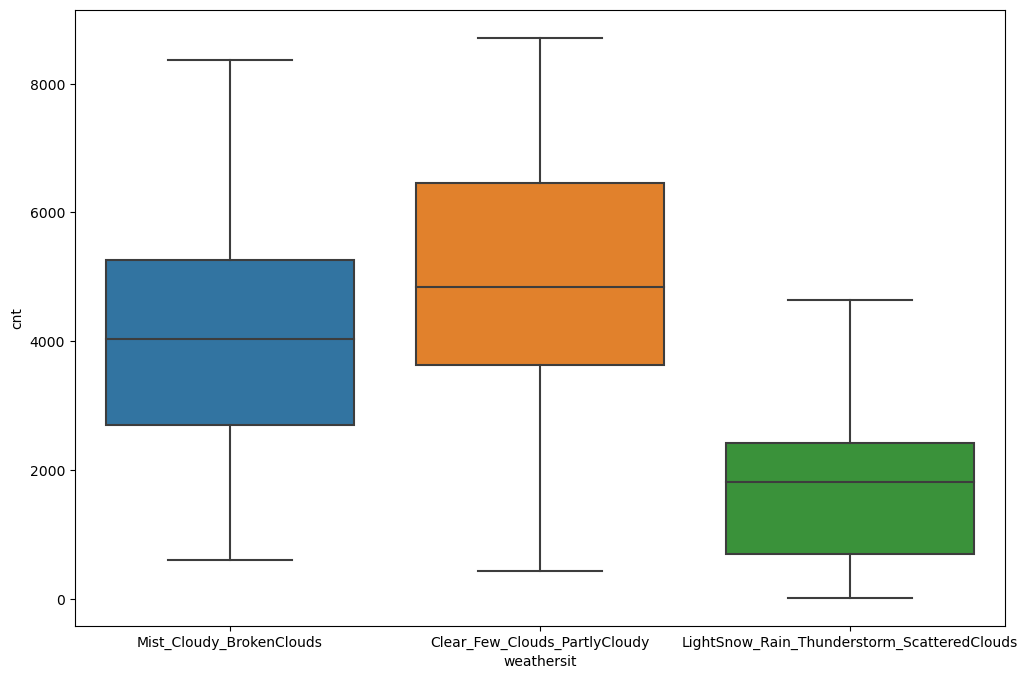

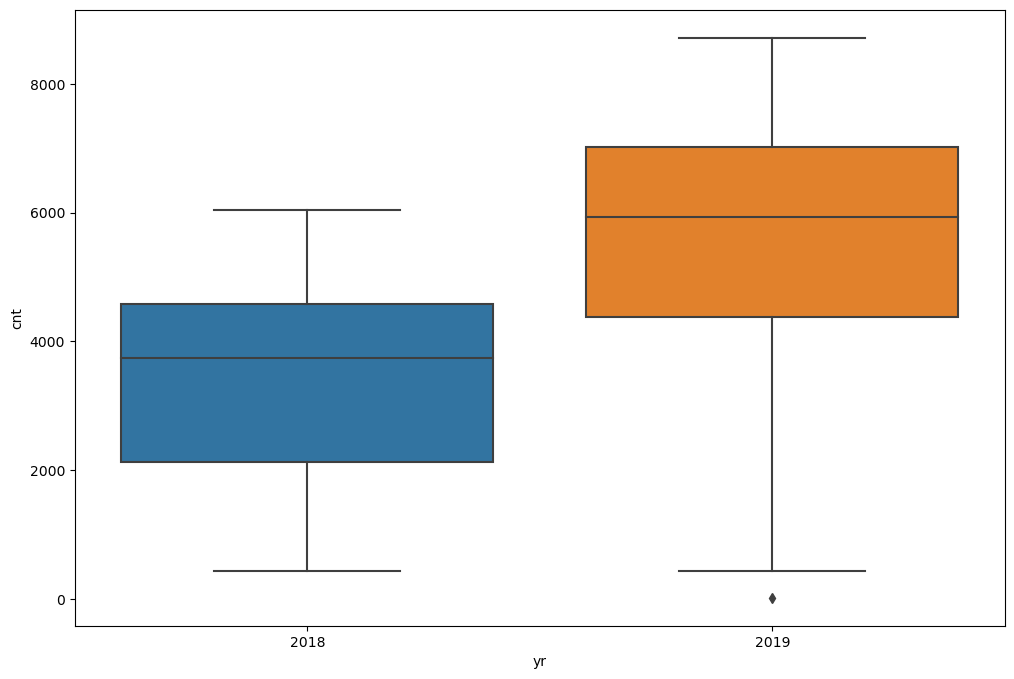

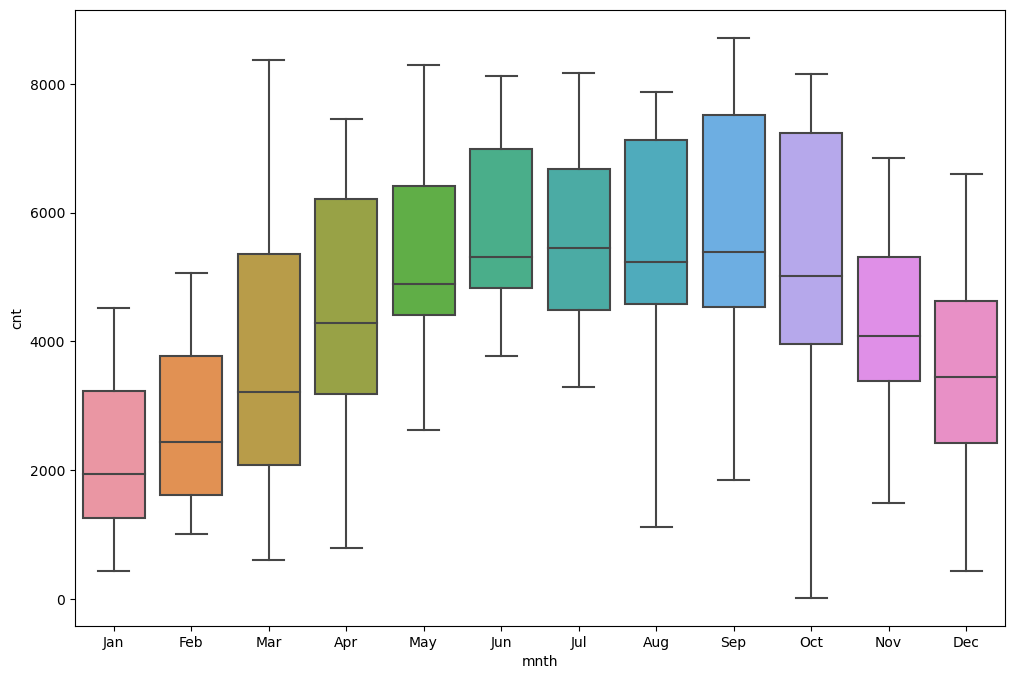

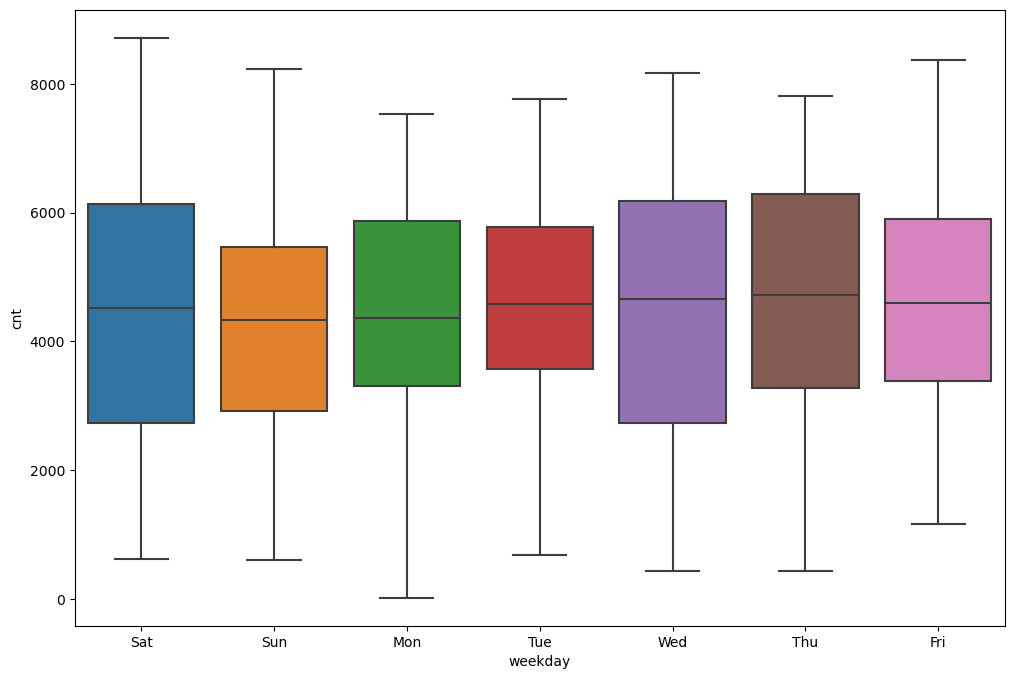

In [59]:
# Visualize the Data
sns.boxplot(x=data['season'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['workingday'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['weathersit'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['yr'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['mnth'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['weekday'], y=data['cnt'])



<p>Interpretation:
<p>The boxplot for season shows that the count of bikes is highest in fall and lowest in spring
<p>The boxplot for workingday shows that the count of bikes is higher on working days than non-working days
<p>The boxplot for weathersit shows that the count of bikes is highest when the weather is clear and few clouds
<p>The boxplot for year shows that the count of bikes is higher in 2019 than 2018
<p>The boxplot for month shows that the count of bikes is highest in September and lowest in January
<p>The boxplot for weekday shows that the count of bikes is highest on Saturday and lowest on Monday


(730, 11)

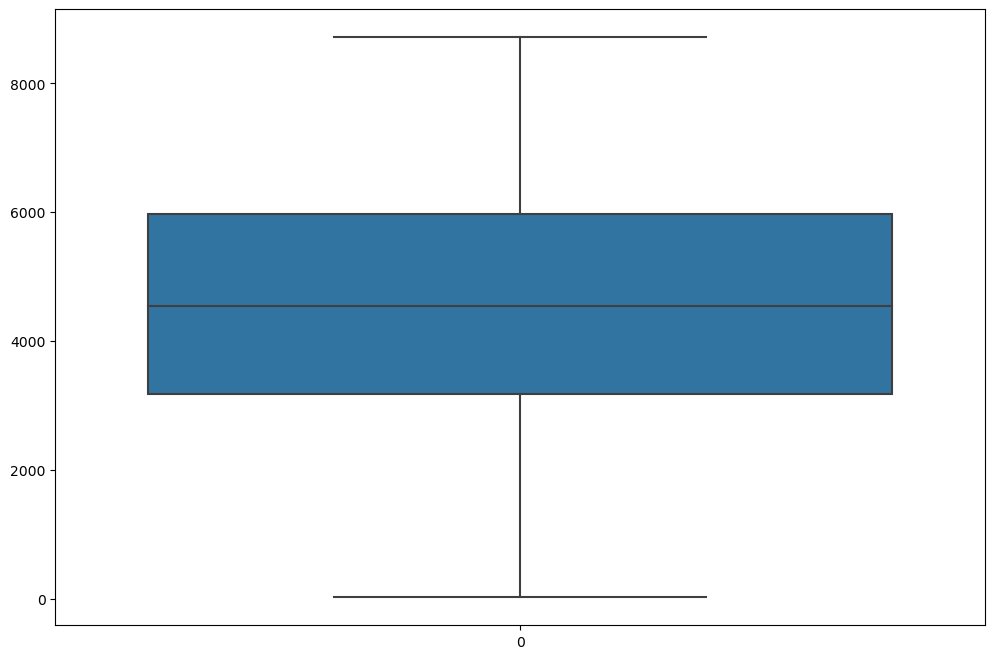

In [60]:
# Check for Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data['cnt'])

data['cnt'].describe()

Q1 = data['cnt'].quantile(0.25)
Q3 = data['cnt'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['cnt'] < (Q1 - 1.5 * IQR)) | (data['cnt'] > (Q3 + 1.5 * IQR)))]
data.shape

In [61]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist_Cloudy_BrokenClouds,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist_Cloudy_BrokenClouds,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear_Few_Clouds_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear_Few_Clouds_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear_Few_Clouds_PartlyCloudy,9.305237,43.6957,12.522300,1600


c:\Users\uttam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


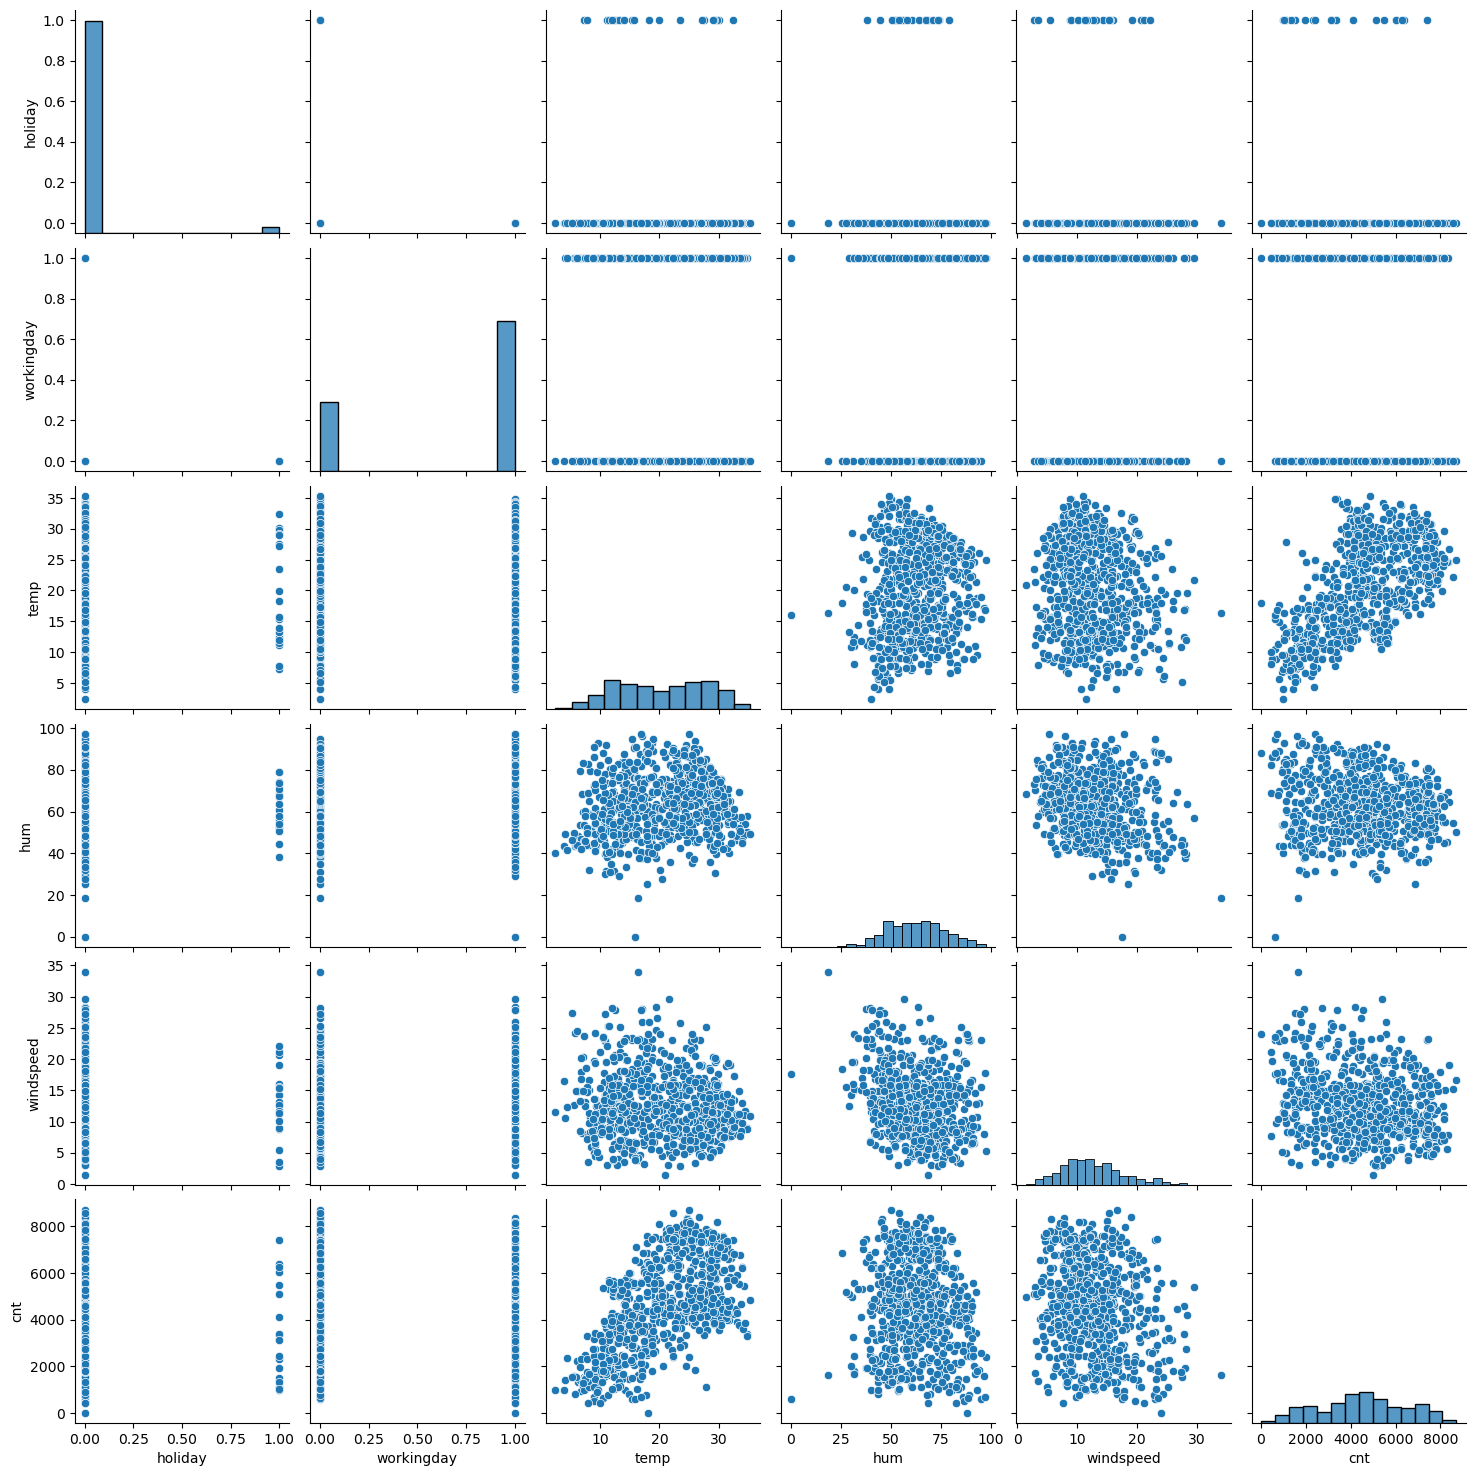

In [67]:
# Pairplot
sns.pairplot(data)

In [69]:
season_dum = pd.get_dummies(data['season'],drop_first=True)
mnth_dum = pd.get_dummies(data['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(data['weathersit'],drop_first=True)

In [71]:
data = pd.concat([data,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
data.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [72]:
data.shape

(730, 29)

In [79]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(30)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 42)


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow_Rain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds
468,2019,0,0,20.295000,50.2917,12.791439,7460,False,True,False,...,False,False,False,True,False,False,False,False,False,False
148,2018,0,0,27.367500,81.8750,14.333846,4788,False,True,False,...,False,False,False,False,True,False,False,False,False,False
302,2018,0,0,13.085847,62.3750,11.833339,3331,False,False,True,...,True,False,False,False,True,False,False,False,False,False
355,2018,0,1,17.356653,75.7500,3.167425,3068,True,False,False,...,False,False,False,False,False,True,False,False,False,True
515,2019,0,1,27.880000,49.2917,13.083693,7338,False,True,False,...,False,False,False,False,False,True,False,False,False,False


### 4. Feature Scaling

In [80]:
# Feature Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow_Rain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds
683,2019,0,1,0.327133,0.639330,0.327101,0.605336,False,False,True,...,False,False,False,False,False,True,False,False,False,True
645,2019,1,0,0.403972,0.731215,0.419004,0.609320,False,False,True,...,True,False,True,False,False,False,False,False,False,True
163,2018,0,1,0.717562,0.509660,0.708724,0.554026,False,True,False,...,False,False,True,False,False,False,False,False,False,False
360,2018,0,1,0.331287,0.785745,0.415925,0.088253,True,False,False,...,False,False,False,False,False,False,True,False,False,True
640,2019,0,1,0.745598,0.817947,0.110593,0.862127,False,False,True,...,True,False,False,False,False,False,False,True,False,True


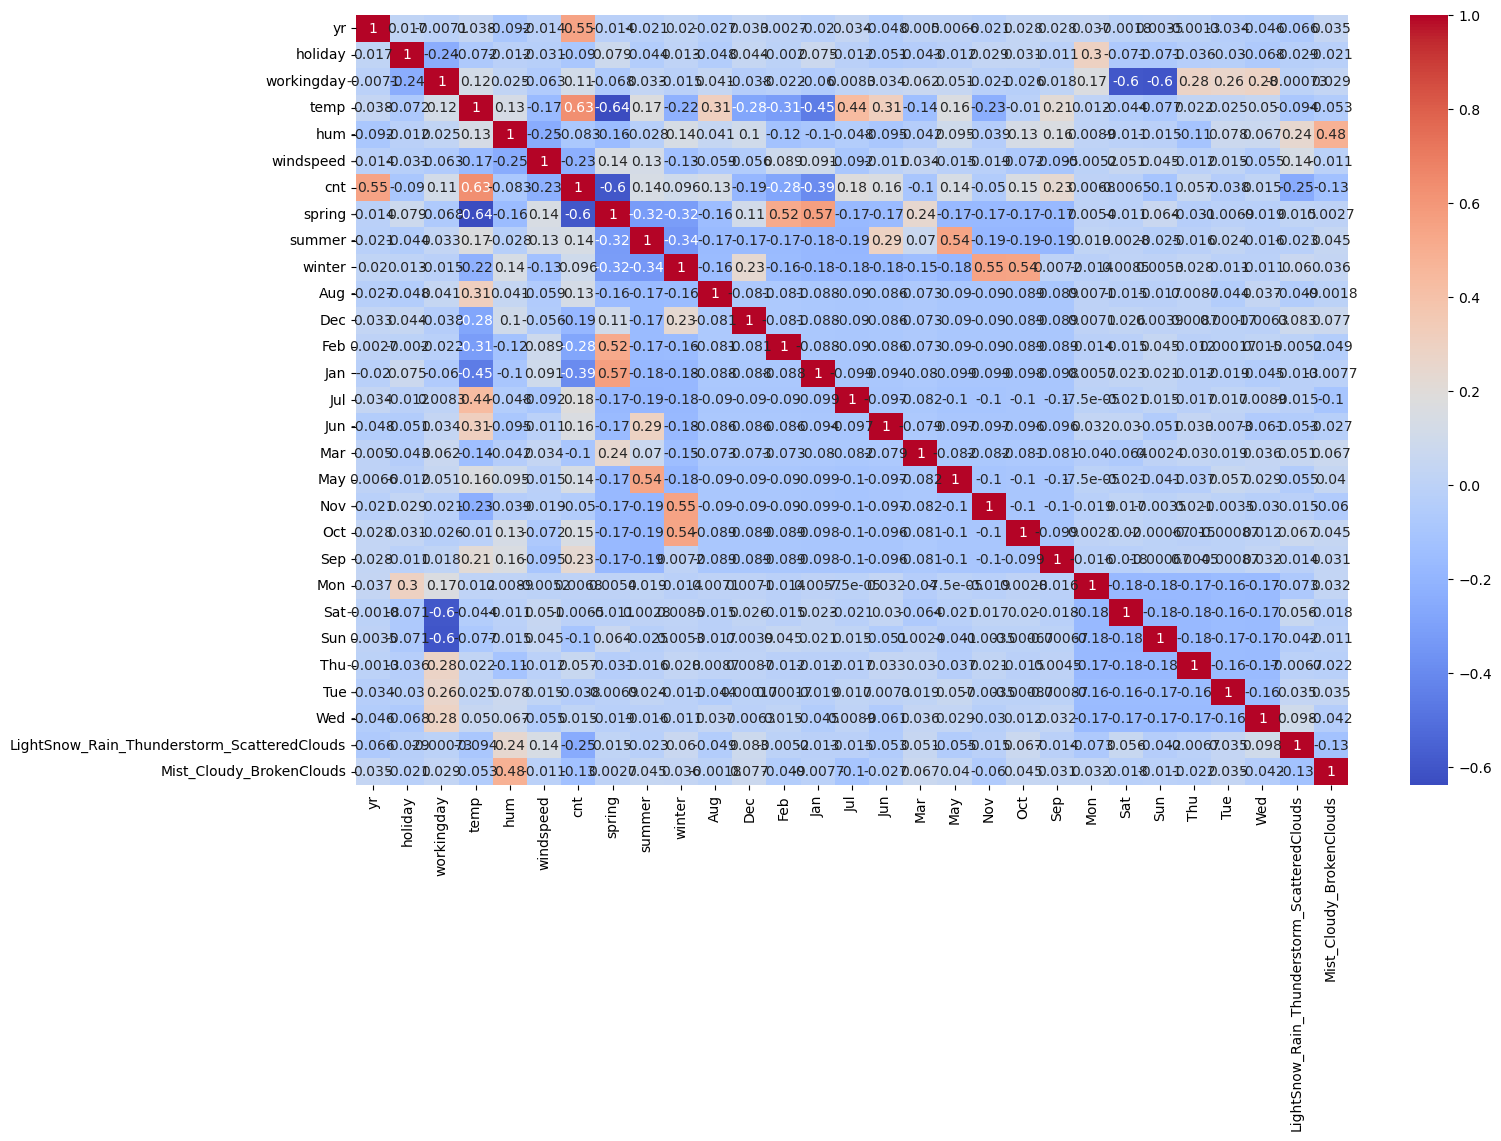

In [81]:
# Plotting the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

In [82]:
# Dividing data into X and y variables
y_train = df_train.pop('cnt')
X_train = df_train

### 5. Model Building

In [86]:

import statsmodels.api as sm

x_train_lm = sm.add_constant(X_train[["temp"]])
lr = sm.OLS(y_train, x_train_lm).fit()

In [87]:
lr.params

const    0.138950
temp     0.651899
dtype: float64

In [88]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     341.0
Date:                Wed, 29 May 2024   Prob (F-statistic):           1.23e-58
Time:                        07:44:01   Log-Likelihood:                 148.76
No. Observations:                 510   AIC:                            -293.5
Df Residuals:                     508   BIC:                            -285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.021      6.603      0.000       0.098       0.180
temp           0.6519      0.035     18.467      0.000       0.583       0.721
==============================================================================
Omnibus:                       12.858   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.206
Skew:                           0.160   Prob(JB):                       0.0165
Kurtosis:                       2.467   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
mlr = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()

mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.11
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.13e-177
Time:                        07:46:52   Log-Likelihood:                 497.13
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     482   BIC:                            -819.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        -379.7541     13.816    -27.486      0.000    -406.902    -352.606
yr                                              0.2354      0.009     27.512      0.000       0.219       0.252
holiday                                       -94.9826      3.454    -27.497      0.000    -101.770     -88.195
workingday                                    -94.9046      3.454    -27.474      0.000    -101.692     -88.117
temp                                            0.4490      0.049      9.236      0.000       0.353       0.545
hum                                            -0.1611      0.041     -3.900      0.000      -0.242      -0.080
windspeed                                      -0.1208      0.025     -4.821      0.000      -0.170      -0.072
spring                                         -0.1479      0.033     -4.536      0.000      -0.212      -0.084
summer                                          0.0123      0.027      0.452      0.651      -0.041       0.066
winter                                          0.0767      0.028      2.766      0.006       0.022       0.131
Aug                                            -0.0156      0.036     -0.436      0.663      -0.086       0.055
Dec                                            -0.0368      0.037     -1.008      0.314      -0.109       0.035
Feb                                             0.0180      0.037      0.486      0.627      -0.055       0.091
Jan                                             0.0017      0.038      0.046      0.963      -0.072       0.076
Jul                                            -0.0464      0.036     -1.283      0.200      -0.117       0.025
Jun                                            -0.0046      0.025     -0.183      0.855      -0.055       0.045
Mar                                             0.0566      0.029      1.949      0.052      -0.000       0.114
May                                             0.0287      0.021      1.343      0.180      -0.013       0.071
Nov                                            -0.0498      0.039     -1.288      0.198      -0.126       0.026
Oct                                             0.0387      0.038      1.020      0.308      -0.036       0.113
Sep                                             0.0716      0.033      2.152      0.032       0.006       0.137
Mon                                            -0.0190      0.016     -1.171      0.242      -0.051       0.013
Sat                                           -94.9098      3.454    -27.479      0.000    -101.696     -88.123
Sun                                           -94.9571      3.454    -27.492      0.000    -101.744     -88.170
Thu                                            -0.0069     

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.astype(float).values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,11534322.91
22,Sun,2638270.31
21,Sat,2604424.16
1,holiday,473549.75
6,spring,10.94
8,winter,8.37
7,summer,8.15
17,Nov,7.23
3,temp,7.06
18,Oct,6.85


In [96]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)


In [97]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
21,Sat,True,1
19,Sep,True,1
18,Oct,True,1
17,Nov,True,1
16,May,True,1
15,Mar,True,1
26,LightSnow_Rain_Thunderstorm_ScatteredClouds,True,1
11,Feb,True,1
10,Dec,True,1


In [98]:
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jul', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Sat', 'LightSnow_Rain_Thunderstorm_ScatteredClouds',
       'Mist_Cloudy_BrokenClouds'],
      dtype='object')

In [100]:
x_train_rfe = X_train[selected_features]

In [105]:
x_train_rfe = np.asarray(x_train_rfe, dtype=np.float64)
x_train_lm = sm.add_constant(x_train_rfe)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.32e-184
Time:                        07:57:17   Log-Likelihood:                 495.03
No. Observations:                 510   AIC:                            -948.1
Df Residuals:                     489   BIC:                            -859.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -475.7938     17.057    -27.895      0.000    -509.308    -442.280
x1             0.2359      0.008     27.921      0.000       0.219       0.253
x2            -0.0426      0.027     -1.550      0.122      -0.097       0.011
x3             0.0400      0.012      3.366      0.001       0.017       0.063
x4             0.4416      0.037     11.830      0.000       0.368       0.515
x5            -0.1666      0.040     -4.162      0.000      -0.245      -0.088
x6            -0.1233      0.025     -4.989      0.000      -0.172      -0.075
x7            -0.1401      0.025     -5.714      0.000      -0.188      -0.092
x8             0.0200      0.018      1.123      0.262      -0.015       0.055
x9             0.0819      0.025      3.236      0.001       0.032       0.132
x10           -0.0358      0.023     -1.544      0.123      -0.081       0.010
x11            0.0171      0.020      0.868      0.386      -0.022       0.056
x12           -0.0356      0.019     -1.885      0.060      -0.073       0.002
x13            0.0575      0.019      3.007      0.003       0.020       0.095
x14            0.0303      0.018      1.709      0.088      -0.005       0.065
x15           -0.0465      0.028     -1.637      0.102      -0.102       0.009
x16            0.0427      0.028      1.529      0.127      -0.012       0.098
x17            0.0811      0.019      4.303      0.000       0.044       0.118
x18            0.0478      0.015      3.155      0.002       0.018       0.078
x19           -0.2305      0.028     -8.202      0.000      -0.286      -0.175
x20           -0.0591      0.011     -5.384      0.000      -0.081      -0.038
==============================================================================
Omnibus:                       83.873   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.708
Skew:                          -0.843   Prob(JB):                     3.53e-45
Kurtosis:                       5.606   Cond. No.                     8.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
x_train_rfe = pd.DataFrame(x_train_rfe, columns=selected_features.tolist() + ['const'])

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,16930698.91
9,Dec,7.00
7,summer,6.22
4,hum,4.18
15,Oct,3.93
16,Sep,3.72
8,winter,3.54
10,Feb,2.16
5,windspeed,1.92
3,temp,1.82
